<a href="https://colab.research.google.com/github/Gopalchalak/Deep-Learning-Mini-Project/blob/main/DropOut_on_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


Data Generation

In [4]:
x_train = np.linspace(-1, 1, 20)

In [5]:
y_train = np.array([-0.6561, -0.3099, -0.59035, -0.50855, -0.285,
                    -0.2443, 0.02445, 0.00135, -0.2006, 0.07475,
                    -0.1422, 0.06515, 0.15265, 0.3521, 0.28415,
                    0.5524, 0.23115, 0.20835, 0.4211, 0.60485])

In [6]:
x_test = np.linspace(-1, 1, 20)

In [7]:
y_test = np.array([-0.69415, -0.451, -0.43005, -0.4484, -0.1475,
                   -0.5019, -0.28055, 0.24595, -0.21425, -0.0286,
                   0.23415, 0.46575, 0.07955, 0.1973, 0.0719,
                   0.3639, 0.5536, 0.3365, 0.50705, 0.33435])

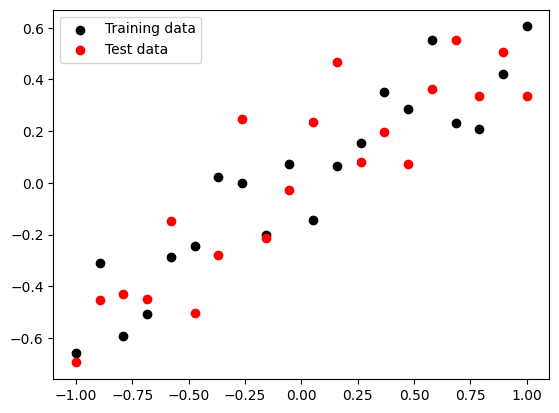

In [8]:
plt.scatter(x_train, y_train, c='black', label='Training data')
plt.scatter(x_test, y_test, c='red', label='Test data')
plt.legend()
plt.show()

Regression Model

In [11]:
from sklearn import metrics
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=1))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

adam = Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer=adam, metrics=['mse'])
history = model.fit(x_train, y_train, epochs=500, validation_data=(x_test, y_test), verbose = False)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,897 (66.00 KB)

 Trainable params: 16,897 (66.00 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# evaluate the model
_, train_mse = model.evaluate(x_train, y_train, verbose=0)
_, test_mse = model.evaluate(x_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.004027072340250015, Test: 0.048090435564517975


In [14]:
y_pred_1 = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


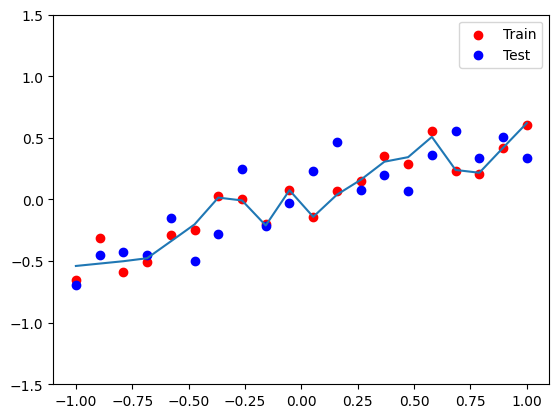

In [15]:
plt.figure()
plt.scatter(x_train, y_train, c='red', label='Train')
plt.scatter(x_test, y_test, c='blue', label='Test')
plt.plot(x_test, y_pred_1)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

**Dropout Model**

In [20]:
model_2 = Sequential()
model_2.add(Dense(128, input_dim=1, activation="relu"))
model_2.add(Dropout(0.5))
model_2.add(Dense(128, activation="relu"))
model_2.add(Dropout(0.5))
model_2.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_2.compile(loss='mse', optimizer=adam, metrics=['mse'])

drop_out_history = model_2.fit(x_train, y_train, epochs=500,
                               validation_data = (x_test, y_test),
                               verbose=False)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# evaluate the model
_, train_mse = model_2.evaluate(x_train, y_train, verbose=0)
_, test_mse = model_2.evaluate(x_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.0148756830021739, Test: 0.03609216958284378


In [22]:
y_pred_2 = model_2.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


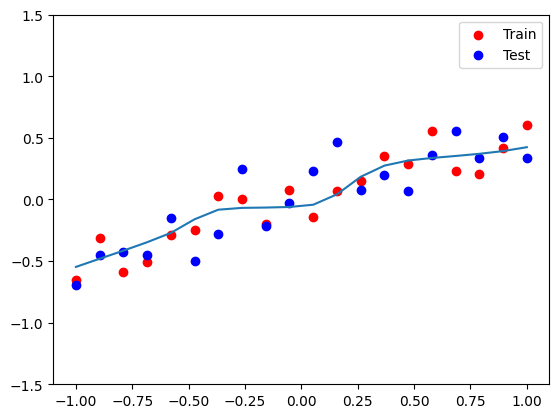

In [23]:
plt.figure()
plt.scatter(x_train, y_train, c='red', label='Train')
plt.scatter(x_test, y_test, c='blue', label='Test')
plt.plot(x_test, y_pred_2)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()